# 🧼 Limpieza de Datos con Pandas

Este notebook muestra cómo limpiar un archivo de datos con errores comunes como nulos, duplicados, tipos incorrectos, y más.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Crear DataFrame con errores comunes

In [2]:
data = {
    ' Fecha ': ['2023-01-01', '2023-01-02', '2023-01-03', np.nan, '2023-01-05'],
    ' Producto ': ['  Manzana', 'Pera ', 'manzana', 'Plátano', 'Uva'],
    'Cantidad': [10, 15, None, 5, 12],
    'Precio': [1.5, 2.0, 1.5, -1.0, 2.5],
    'Cliente': ['Juan', 'María', 'juan', 'Luis', None]
}
df = pd.DataFrame(data)
df

,Fecha,Producto,Cantidad,Precio,Cliente
0,2023-01-01,Manzana,10.0,1.5,Juan
1,2023-01-02,Pera,15.0,2.0,María
2,2023-01-03,manzana,NaN,1.5,juan
3,NaN,Plátano,5.0,-1.0,Luis
4,2023-01-05,Uva,12.0,2.5,None


## 2. Limpieza paso a paso

In [3]:
# Renombrar columnas
df.columns = df.columns.str.strip().str.lower()

# Limpiar texto
df['producto'] = df['producto'].str.strip().str.lower()
df['cliente'] = df['cliente'].str.strip().str.lower()

# Convertir fecha
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Rellenar valores nulos
df['cantidad'] = df['cantidad'].fillna(0)
df['cliente'] = df['cliente'].fillna('desconocido')

# Corregir precios negativos
df = df[df['precio'] > 0]

# Crear columna total
df['total'] = df['cantidad'] * df['precio']

df

C:\Users\PC\AppData\Local\Temp\ipykernel_29272\2931774361.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'] = df['cantidad'] * df['precio']


,fecha,producto,cantidad,precio,cliente,total
0,2023-01-01,manzana,10.0,1.5,juan,15.0
1,2023-01-02,pera,15.0,2.0,maría,30.0
2,2023-01-03,manzana,0.0,1.5,juan,0.0
4,2023-01-05,uva,12.0,2.5,desconocido,30.0


## 3. Agrupación por producto

In [4]:
resumen = df.groupby('producto').agg({
    'cantidad': 'sum',
    'total': 'sum'
}).sort_values(by='total', ascending=False)
resumen

,cantidad,total
producto,,
pera,15.0,30.0
uva,12.0,30.0
manzana,10.0,15.0


## 4. Visualización de productos más vendidos

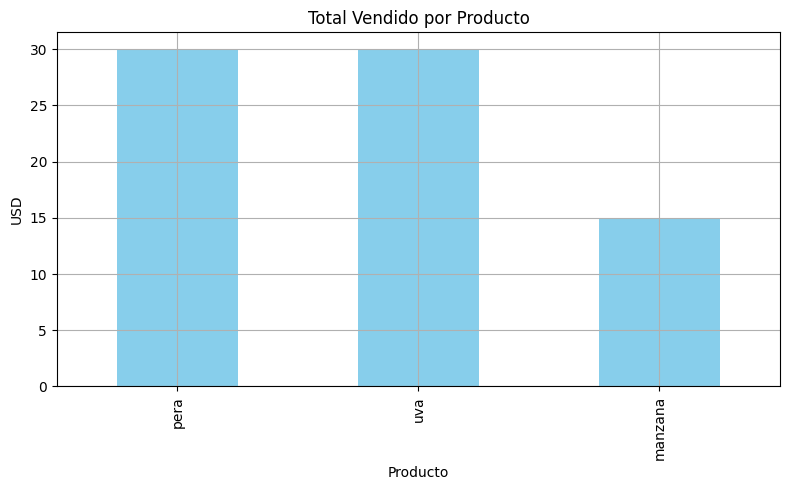

In [5]:
resumen['total'].plot(kind='bar', figsize=(8,5), title='Total Vendido por Producto', ylabel='USD', xlabel='Producto', color='skyblue')
plt.grid(True)
plt.tight_layout()
plt.show()